In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
data = pd.read_csv('data/Financial Distress.csv')

In [3]:
data.shape

(3672, 86)

In [4]:
data.columns

Index(['Company', 'Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56',
       'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',
       'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

In [6]:
data['Company'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [7]:
data['Time'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

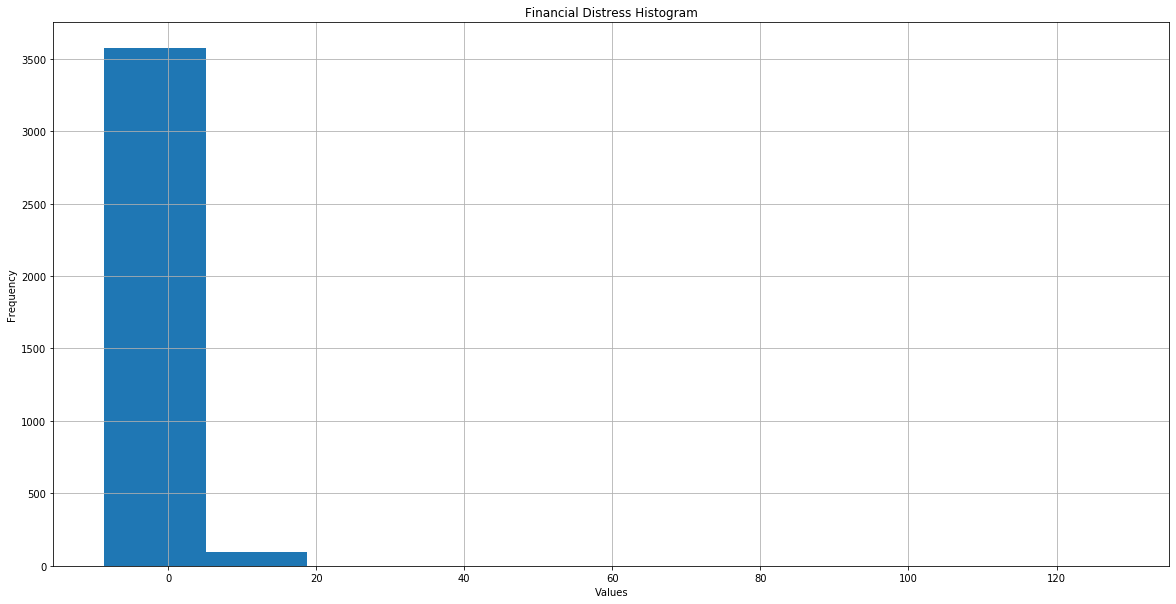

In [8]:
plt.figure(figsize=(20,10))
plt.hist(data['Financial Distress'])
plt.title('Financial Distress Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
data['Financial Distress'].describe()

count    3672.000000
mean        1.040257
std         2.652227
min        -8.631700
25%         0.172275
50%         0.583805
75%         1.351750
max       128.400000
Name: Financial Distress, dtype: float64

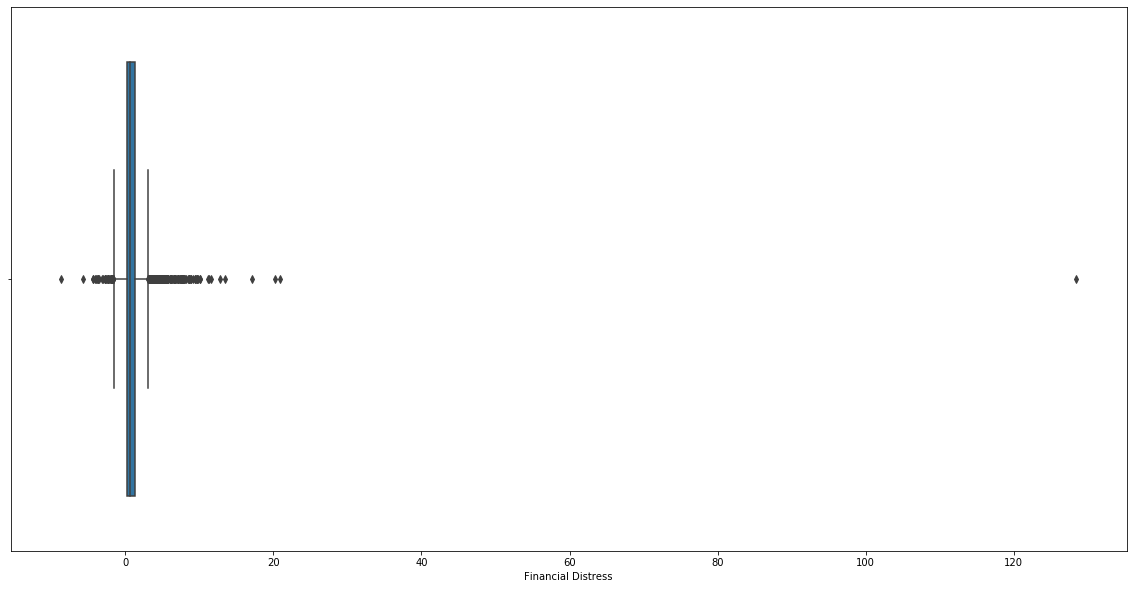

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(x=data['Financial Distress'])

In [11]:
max(data['Financial Distress'])

128.4

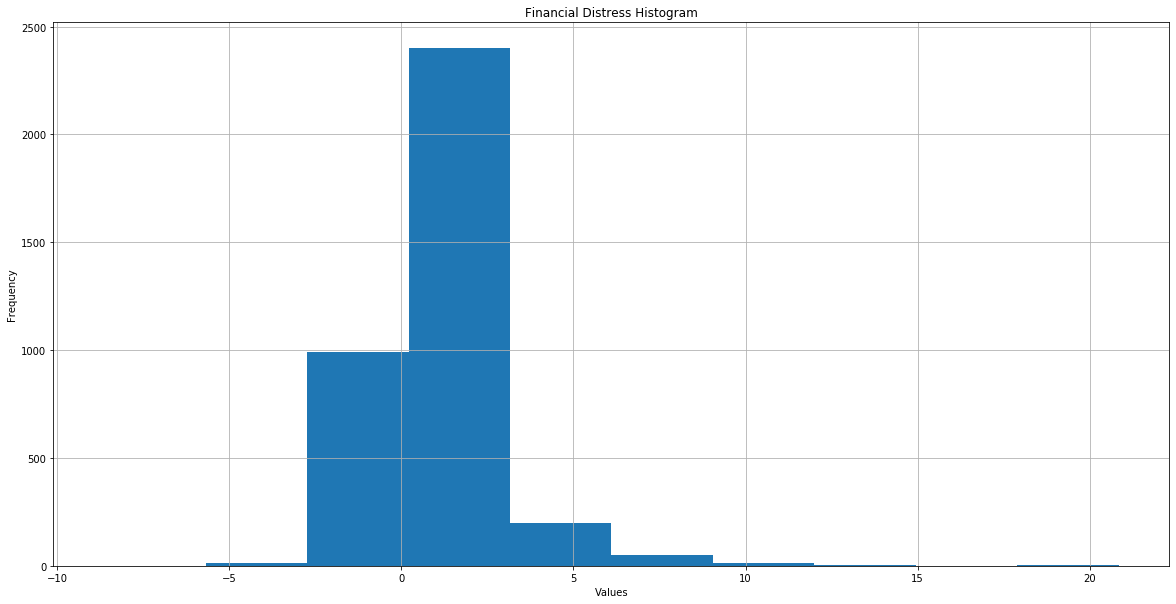

In [12]:
plt.figure(figsize=(20,10))
plt.hist(data[data['Financial Distress'] < 100]['Financial Distress'])
plt.title('Financial Distress Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
data['status'] = np.where(data['Financial Distress'] > -0.5,0,1)

In [14]:
data['status'].value_counts()

0    3536
1     136
Name: status, dtype: int64

In [15]:
data['status'].value_counts()[1]/data['status'].count() * 100

3.7037037037037033

In [16]:
data_one_period = data.drop_duplicates(subset=['Company'], keep='last')

In [17]:
data_one_period.shape

(422, 87)

In [18]:
data_one_period['status'].value_counts()

0    286
1    136
Name: status, dtype: int64

In [19]:
data_one_period.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
3,1,4,-0.56657,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,39.80,38.377,17.167,16.0,5.6,22,-0.32539,33,52,1
17,2,14,2.23200,2.2263,0.325880,0.40651,0.90804,0.455340,0.493550,1.65280,...,227.50,214.500,21.000,20.5,8.6,29,2.65980,20,40,0
18,3,1,-1.65990,0.8744,-0.034676,0.79350,0.60952,-0.002632,-0.086847,0.50609,...,27.07,26.102,16.000,16.0,0.2,25,-0.30317,8,37,1
32,4,14,1.27700,3.1096,0.133630,0.21635,0.70654,0.173030,0.446080,1.25870,...,227.50,214.500,21.000,20.5,8.6,12,1.09640,41,57,0
46,5,14,1.63780,1.2121,0.084192,0.70161,0.33803,0.130500,0.144520,0.93530,...,227.50,214.500,21.000,20.5,8.6,23,1.53660,25,50,0


In [20]:
data_final = data_one_period.drop(['Financial Distress', 'Company'], axis=1)

In [21]:
data_final.head()

,Time,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
3,4,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.10791,...,39.80,38.377,17.167,16.0,5.6,22,-0.32539,33,52,1
17,14,2.2263,0.325880,0.40651,0.90804,0.455340,0.493550,1.65280,0.358880,0.54909,...,227.50,214.500,21.000,20.5,8.6,29,2.65980,20,40,0
18,1,0.8744,-0.034676,0.79350,0.60952,-0.002632,-0.086847,0.50609,-0.056892,-0.16793,...,27.07,26.102,16.000,16.0,0.2,25,-0.30317,8,37,1
32,14,3.1096,0.133630,0.21635,0.70654,0.173030,0.446080,1.25870,0.189140,0.17053,...,227.50,214.500,21.000,20.5,8.6,12,1.09640,41,57,0
46,14,1.2121,0.084192,0.70161,0.33803,0.130500,0.144520,0.93530,0.249060,0.28215,...,227.50,214.500,21.000,20.5,8.6,23,1.53660,25,50,0


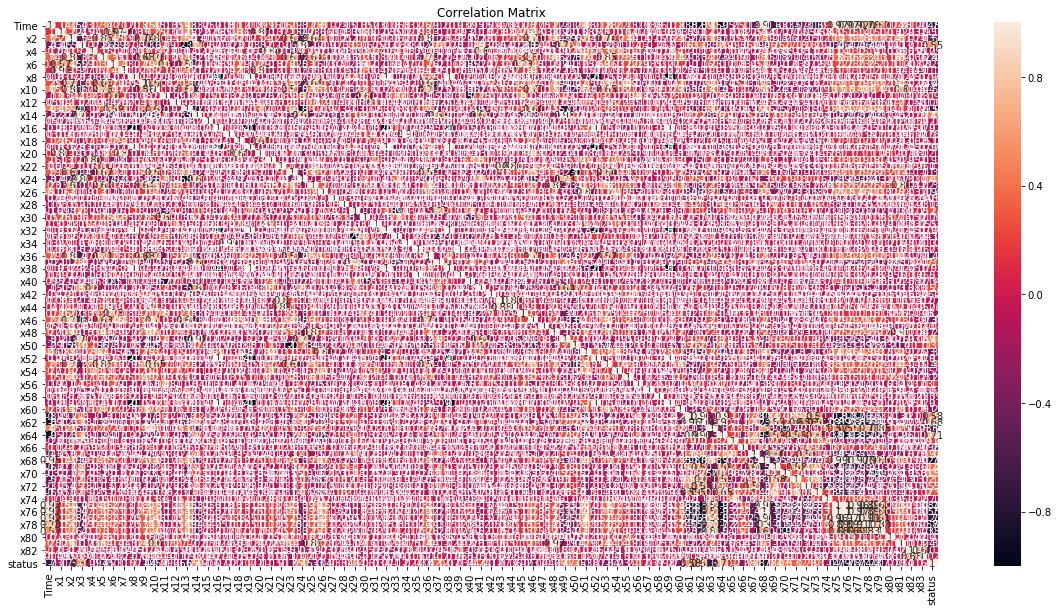

In [22]:
plt.figure(figsize=(20,10))
plt.title('Correlation Matrix')
sns.heatmap(data_final.corr(), annot=True)
plt.show()

In [23]:
abs(data_final.corr()['status']).sort_values(ascending=True)

x47       0.004618
x82       0.015779
x22       0.016843
x17       0.022404
x83       0.022902
            ...   
x78       0.782831
x68       0.783543
x76       0.784320
x75       0.791193
status    1.000000
Name: status, Length: 85, dtype: float64

In [24]:
variables = abs(data_final.corr()['status']).sort_values(ascending=True)

In [25]:
v1 = variables[0.05 < variables.values]
v2 = variables[variables.values < 0.7]
len(v2.index)

76

In [26]:
ind = v2.index
v2.index

Index(['x47', 'x82', 'x22', 'x17', 'x83', 'x34', 'x27', 'x39', 'x31', 'x35',
       'x57', 'x40', 'x28', 'x15', 'x30', 'x44', 'x12', 'x38', 'x32', 'x8',
       'x19', 'x59', 'x16', 'x52', 'x43', 'x80', 'x11', 'x4', 'x58', 'x18',
       'x20', 'x33', 'x42', 'x74', 'x21', 'x7', 'x56', 'x1', 'x45', 'x65',
       'x55', 'x54', 'x29', 'x41', 'x60', 'x72', 'x66', 'x48', 'x6', 'x73',
       'x71', 'x37', 'x25', 'x53', 'x81', 'x50', 'x23', 'x46', 'x67', 'x51',
       'x69', 'x26', 'x36', 'x9', 'x5', 'x24', 'x49', 'x14', 'x70', 'x2', 'x3',
       'x13', 'x61', 'x10', 'x63', 'x62'],
      dtype='object')

In [27]:
y = data_final['status']
X = data_final[ind]

In [28]:
X.shape

(422, 76)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

In [30]:
y_train.head()

1555    0
3525    0
1326    1
1278    1
2945    0
Name: status, dtype: int64

In [31]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
clf.score(X_train, y_train)

0.8847457627118644

In [33]:
clf.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

In [34]:
y_pred = clf.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [36]:
accuracy_score(y_test, y_pred)

0.8740157480314961

In [37]:
confusion_matrix(y_test, y_pred)

array([[86, 11],
       [ 5, 25]])

In [38]:
c = confusion_matrix(y_test, y_pred)

In [39]:
f1_score(y_test, y_pred)

0.7575757575757577

In [40]:
rf = RandomForestClassifier(max_depth=4, random_state=0).fit(X_train, y_train)
print(rf.score(X_train, y_train))
y_pred2 = rf.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(f1_score(y_test, y_pred2))

0.9694915254237289
0.9448818897637795
0.888888888888889


/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
sv = SVC().fit(X_train, y_train)
print(sv.score(X_train, y_train))
y_pred3 = sv.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(f1_score(y_test, y_pred3))

1.0
0.7637795275590551
0.0


/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
confusion_matrix(y_test, y_pred3)

array([[97,  0],
       [30,  0]])

In [43]:
ab = AdaBoostClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)
print(ab.score(X_train, y_train))
y_pred4 = ab.predict(X_test)
print(accuracy_score(y_test, y_pred4))
print(f1_score(y_test, y_pred4))

0.9864406779661017
0.9606299212598425
0.9180327868852459


In [53]:
data_one_period2 = data.drop_duplicates(subset=['Company'], keep='last')
data_one_period2.shape

(422, 87)

In [54]:
pd.qcut(data_one_period2['Financial Distress'], 4).value_counts()

(0.823, 20.176]    106
(-8.633, -0.67]    106
(0.196, 0.823]     105
(-0.67, 0.196]     105
Name: Financial Distress, dtype: int64

In [58]:
data_one_period2['status'] = pd.qcut(data_one_period2['Financial Distress'], 4, labels=False)

/home/stefan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
data_one_period2['status'].value_counts()

3    106
0    106
2    105
1    105
Name: status, dtype: int64

In [62]:
predictors = abs(data.corr()['Financial Distress']).sort_values(ascending=True)
predictors = predictors[predictors >0.05]
predictors = predictors[predictors < 0.7]
len(predictors)

48

In [64]:
indx = predictors.index

In [65]:
y1 = data_one_period2['status']
X1 = data_one_period2[indx]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
     X1, y1, test_size=0.3, random_state=42)

In [77]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.score(X_train, y_train))
y_pred1 = clf.predict(X_test)
print(accuracy_score(y_test, y_pred1))
#print(f1_score(y_test, y_pred1))
precision, recall, fscore, support = score(y_test, y_pred1)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.7932203389830509
0.7401574803149606
precision: [0.65625    0.56666667 0.77419355 0.94117647]
recall: [0.91304348 0.5862069  0.6        0.91428571]
fscore: [0.76363636 0.57627119 0.67605634 0.92753623]
support: [23 29 40 35]


/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [78]:
sv = SVC().fit(X_train, y_train)
print(sv.score(X_train, y_train))
y_pred3 = sv.predict(X_test)
print(accuracy_score(y_test, y_pred3))
#print(f1_score(y_test, y_pred3))
precision, recall, fscore, support = score(y_test, y_pred3)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

1.0
0.18110236220472442
precision: [0.18110236 0.         0.         0.        ]
recall: [1. 0. 0. 0.]
fscore: [0.30666667 0.         0.         0.        ]
support: [23 29 40 35]


/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
rf = RandomForestClassifier(max_depth=4, random_state=0).fit(X_train, y_train)
print(rf.score(X_train, y_train))
y_pred2 = rf.predict(X_test)
print(accuracy_score(y_test, y_pred2))
#print(f1_score(y_test, y_pred2))
precision, recall, fscore, support = score(y_test, y_pred2)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.8949152542372881
0.8346456692913385
precision: [0.79310345 0.77777778 0.83333333 0.91428571]
recall: [1.         0.72413793 0.75       0.91428571]
fscore: [0.88461538 0.75       0.78947368 0.91428571]
support: [23 29 40 35]


/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
ab = AdaBoostClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)
print(ab.score(X_train, y_train))
y_pred4 = ab.predict(X_test)
print(accuracy_score(y_test, y_pred4))
#print(f1_score(y_test, y_pred4))
precision, recall, fscore, support = score(y_test, y_pred4)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

0.7796610169491526
0.6850393700787402
precision: [1.         0.42028986 0.         1.        ]
recall: [1. 1. 0. 1.]
fscore: [1.         0.59183673 0.         1.        ]
support: [23 29 40 35]


/home/stefan/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
